In [0]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM,Dense
import matplotlib.pyplot as plt
from google.colab import files

Using TensorFlow backend.


In [0]:
uploaded = files.upload()

Saving GFSA35A.csv to GFSA35A (1).csv


In [0]:

df = pd.read_csv('GFSA35A.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df['Close']
df.head()

Date
2015-01-02    14.8507
2015-01-05    14.5278
2015-01-06    14.7431
2015-01-07    15.1735
2015-01-08    15.4964
Name: Close, dtype: float64

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


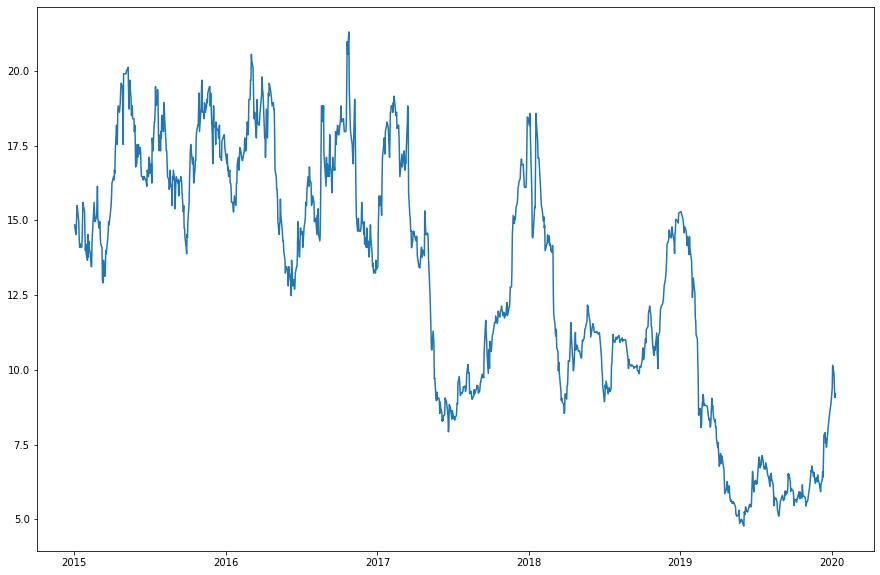

In [0]:
plt.figure(figsize = (15,10))
plt.plot(df)
plt.show()

In [0]:
look_back = 30
foward_days = 7
num_periods = 21

In [0]:
array = df.values.reshape(df.shape[0],1)
array[:5]

array([[14.8507],
       [14.5278],
       [14.7431],
       [15.1735],
       [15.4964]])

In [0]:
from sklearn.preprocessing import MinMaxScaler
scl = MinMaxScaler()
array = scl.fit_transform(array)
array[:5]

array([[0.6095661 ],
       [0.59004078],
       [0.60305968],
       [0.62908537],
       [0.64861069]])

In [0]:
#Dividir os dados em treino e teste

division = len(array) - num_periods*foward_days
array_test = array[division-look_back:]
array_train = array[:division]

In [0]:
def processData(data, look_back, foward_days,jump=1):
    X,Y = [],[]
    for i in range(0,len(data) -look_back -foward_days +1, jump):
        X.append(data[i:(i+look_back)])
        Y.append(data[(i+look_back):(i+look_back+foward_days)])
    return np.array(X),np.array(Y)

In [0]:
X_test,y_test = processData(array_test,look_back,foward_days,foward_days)
y_test = np.array([list(a.ravel()) for a in y_test])

X,y = processData(array_train,look_back,foward_days)
y = np.array([list(a.ravel()) for a in y])

from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.20, random_state=42)

In [0]:
print(X_train.shape)
print(X_validate.shape)
print(X_test.shape)
print(y_train.shape)
print(y_validate.shape)
print(y_test.shape)

(853, 30, 1)
(214, 30, 1)
(21, 30, 1)
(853, 7)
(214, 7)
(21, 7)


In [0]:
NUM_NEURONS_FirstLayer = 50
NUM_NEURONS_SecondLayer = 30
EPOCHS = 50

#Construindo o modelo
model = Sequential()
model.add(LSTM(NUM_NEURONS_FirstLayer,input_shape=(look_back,1), return_sequences=True))
model.add(LSTM(NUM_NEURONS_SecondLayer,input_shape=(NUM_NEURONS_FirstLayer,1)))
model.add(Dense(foward_days))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train,y_train,epochs=EPOCHS,validation_data=(X_validate,y_validate),shuffle=True,batch_size=2, verbose=2)





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 853 samples, validate on 214 samples
Epoch 1/50





 - 18s - loss: 0.0188 - val_loss: 0.0058
Epoch 2/50
 - 16s - loss: 0.0070 - val_loss: 0.0049
Epoch 3/50
 - 17s - loss: 0.0062 - val_loss: 0.0053
Epoch 4/50
 - 17s - loss: 0.0055 - val_loss: 0.0071
Epoch 5/50
 - 17s - loss: 0.0055 - val_loss: 0.0041
Epoch 6/50
 - 17s - loss: 0.0052 - val_loss: 0.0043
Epoch 7/50
 - 17s - loss: 0.0047 - val_loss: 0.0040
Epoch 8/50
 - 16s - loss: 0.0045 - val_loss: 0.0035
Epoch 9/50
 - 17s - loss: 0.0042 - val_loss: 0.0069
Epoch 10/50
 - 17s - loss: 0.0041 - val_loss: 0.0031
Epoch 11/50
 - 17s - loss: 0.0038 - val_loss: 0.0033
Epoch 12/50
 - 17s - loss: 0.0036 - val_loss: 0.0031
Epoch 13/50
 - 17s - loss: 0.0038 - val_loss: 0.0031
Epoch 14/50
 - 17s - loss: 0.0036 - val_loss: 0.0034
Epoch 15/50
 - 17s - loss: 0.0037 - val_loss: 0.0035
Epoch 16/50
 - 17s - loss: 0.0036 - val_loss: 0.0035
Epoch 17/

In [0]:
results = model.evaluate(test_data, test_labels)

print(results)

In [0]:
history_dict = history.history
history_dict.keys()

dict_keys(['acc', 'val_loss', 'loss', 'val_acc'])

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" é para ponto azul
plt.plot(epochs, loss, 'bo', label='Training loss')
# linha azul sólida
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
plt.clf()   # limpar a figura
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

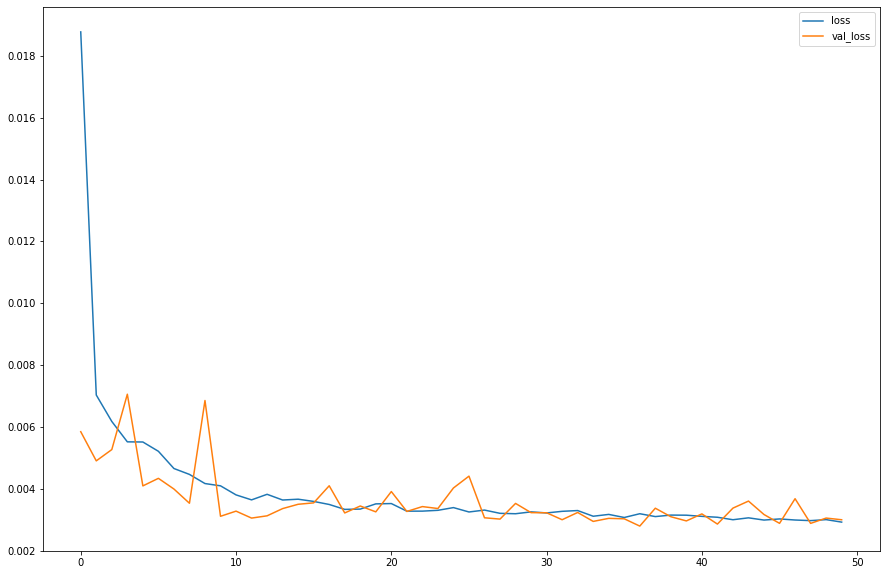

In [0]:
plt.figure(figsize = (15,10))

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(loc='best')
plt.show()

In [0]:
#Vamos prever os dados de Teste para o resultado
Xt = model.predict(X_test)

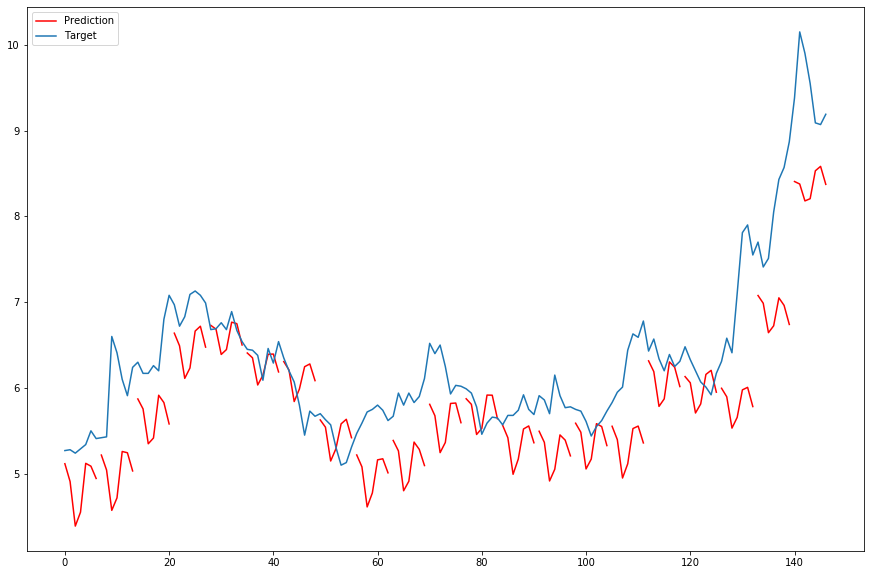

In [0]:
plt.figure(figsize = (15,10))

for i in range(0,len(Xt)):
    plt.plot([x + i*foward_days for x in range(len(Xt[i]))], scl.inverse_transform(Xt[i].reshape(-1,1)), color='r')
    
plt.plot(0, scl.inverse_transform(Xt[i].reshape(-1,1))[0], color='r', label='Prediction') 
    
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)), label='Target')
plt.legend(loc='best')
plt.show()

In [0]:
#sepraro em Treino e Teste

division = len(array) - num_periods*foward_days

leftover = division%foward_days+1

array_test = array[division-look_back:]
array_train = array[leftover:division]

In [0]:
Xtrain,ytrain = processData(array_train,look_back,foward_days,foward_days)
Xtest,ytest = processData(array_test,look_back,foward_days,foward_days)

In [0]:
Xtrain = model.predict(Xtrain)
Xtrain = Xtrain.ravel()

Xtest = model.predict(Xtest)
Xtest = Xtest.ravel()

In [0]:

y = np.concatenate((ytrain, ytest), axis=0)

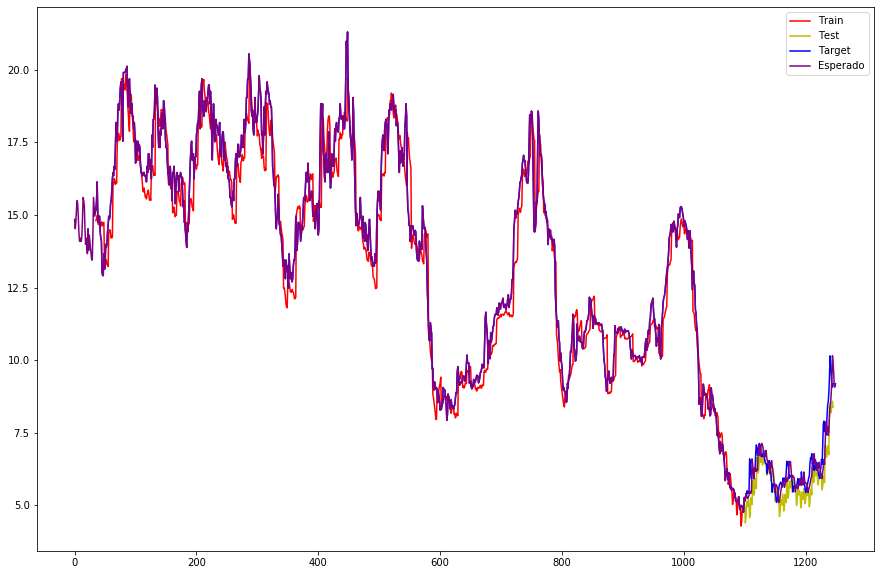

In [0]:
plt.figure(figsize = (15,10))

# Data in Train/Validation
plt.plot([x for x in range(look_back+leftover, len(Xtrain)+look_back+leftover)], scl.inverse_transform(Xtrain.reshape(-1,1)), color='r', label='Train')
# Data in Test
plt.plot([x for x in range(look_back +leftover+ len(Xtrain), len(Xtrain)+len(Xtest)+look_back+leftover)], scl.inverse_transform(Xtest.reshape(-1,1)), color='y', label='Test')

#Data used
plt.plot([x for x in range(look_back+leftover, look_back+leftover+len(Xtrain)+len(Xtest))], scl.inverse_transform(y.reshape(-1,1)), color='b', label='Target')

#Initial data. It should overlap the data uses
plt.plot(scl.inverse_transform(array), color='purple', label='Esperado')

plt.legend(loc='best')
plt.show()